<a href="https://colab.research.google.com/github/mhutama/snerd/blob/main/snerd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# #**1** - Install required python libraries

In [ ]:
# Import libraries
import requests
import pandas as pd
from datetime import datetime

# **#2** - Please use your own urlscan API, register to https://urlscan.io/user/

*   Please use your own urlscan API, register to https://urlscan.io/user/signup/
*   for search keyword guidance refer to https://urlscan.io/docs/search/

---
*   example of keyword : domain.keyword: *crowdstrike* AND NOT crowdstrike.com AND NOT crowdstrike.litmos.com AND NOT www.www* AND NOT youtube.com AND NOT godaddy.com AND NOT wikipedia AND NOT okta.com AND date:>now-9d



In [ ]:
# Function to search urlscan.io with a given keyword
def search_urlscan(keyword, api_key):
    url = f"https://urlscan.io/api/v1/search/?q={keyword}&size=10000"
    headers = {"API-Key": api_key}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}")
        return None

# Function to export results to CSV with UTF-8 encoding
def export_to_csv(data, filename):
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False, encoding='utf-8')
    print(f"Results exported to {filename}")

# Function to format the scan date
def format_scan_date(scan_date):
    try:
        dt = datetime.strptime(scan_date, "%Y-%m-%dT%H:%M:%S.%fZ")
        return dt.strftime("%d-%b-%Y %H:%M:%S UTC")
    except ValueError:
        return "N/A"

# Main function
def main():
    api_key = input("Enter your urlscan.io API key: ")
    keyword = input("Enter the keyword to search: ")
    results = search_urlscan(keyword, api_key)
    if results:
        # Extracting relevant data
        data = []
        for result in results.get("results", []):
            # Convert the scan date to the desired format
            scan_date_str = result.get("task", {}).get("time", "")
            if scan_date_str:
                scan_date = datetime.strptime(scan_date_str, "%Y-%m-%dT%H:%M:%S.%fZ")
                formatted_date = scan_date.strftime("%d-%b-%Y %H:%M:%S - UTC")
            else:
                formatted_date = "N/A"

            data.append({
                "Domain": result.get("page", {}).get("domain", ""),
                "Check Date": formatted_date,
                "Page Title": result.get("page", {}).get("title", "N/A")
            })
        # Exporting to CSV
        export_to_csv(data, "urlscan-search-results.csv")

# Run the main function
if __name__ == "__main__":
    main()


#3 - Output file location, by expanding table of contents - go to Files in the left corner
 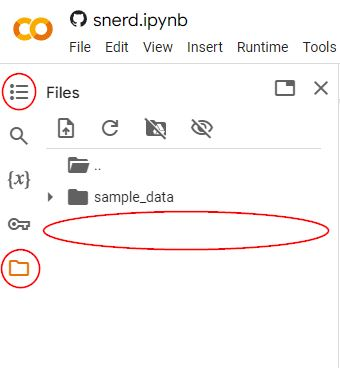